Go directly to:
- [**Start page**](https://github.com/m-guggenmos/remeta/)
- [**Installation**](https://github.com/m-guggenmos/remeta/blob/master/INSTALL.md)
- [**Basic Usage**](https://github.com/m-guggenmos/remeta/blob/master/demo/basic_usage.ipynb)
- [**Common use cases**](https://github.com/m-guggenmos/remeta/blob/master/demo/common_use_cases.ipynb)
- [**Exotic use cases** (this page)](https://github.com/m-guggenmos/remeta/blob/master/demo/exotic_use_cases.ipynb)

## Exotic use cases
[Exotic use case 1: Fit a complex sensory model](#uc1)

[Exotic use case 2: Fit a complex metacognitive model](#uc2)

[Exotic use case 3: Criterion-based link function with variable confidence levels](#uc3)

In a first step we import the remeta module

In [1]:
import remeta

<a id='uc1'></a>

### Exotic use case 1: Fit a complex sensory model

In the following example we consider a more complex dataset which has different sensory noise and biases for the two stimulus categories. In addition, it was generated with a sensory threshold, which is the minimum level of sensory evidence required to drive the system.

In [2]:
stimuli, choices, confidence, params = remeta.load_dataset('sens_complex', return_params=True)

Loading dataset 'sens_complex' which was generated as follows:
..Generative model:
    Metatacognitive noise type: noisy_report
    Metatacognitive noise distribution: truncated_norm
    Link function: probability_correct
..Generative parameters:
    noise_sens: [0.5, 0.7]
    thresh_sens: 0.1
    bias_sens: [0.6, 0.1]
..Characteristics:
    No. subjects: 1
    No. samples: 5000
    Type 1 performance: 61.4%


Let's take a look at the psychometric function:

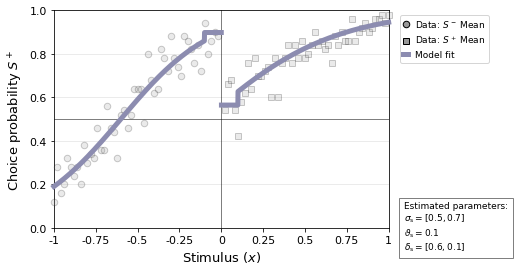

In [3]:
remeta.plot_psychometric(choices, stimuli, params, highlight_fit=True);

Admittedly, this is an weird psychometric function. The discontinuity is due to different levels of sensory noise and bias for the two stimulus categories and the flat region corresponds to the threshold. This example mainly goes to show that the toolbox can fit such an extreme case scenario.

In [4]:
cfg = remeta.Configuration()
cfg.skip_meta = True
cfg.enable_noise_sens = 2
cfg.enable_thresh_sens = 1
cfg.enable_bias_sens = 2
cfg.true_params = params
rem = remeta.ReMeta(cfg=cfg)
rem.fit(stimuli, choices, confidence)


+++ Sensory level +++
Initial guess (neg. LL: 13630.20)
    [guess] noise_sens_0: 0.1
    [guess] noise_sens_1: 0.1
    [guess] thresh_sens: 0
    [guess] bias_sens_0: 0
    [guess] bias_sens_1: 0
Performing local optimization
    [final] noise_sens: [0.537, 0.769] (true: [0.5, 0.7])
    [final] thresh_sens: 0.164 (true: 0.1)
    [final] bias_sens: [0.596, 0.14] (true: [0.6, 0.1])
Final neg. LL: 2619.74
Neg. LL using true params: 2611.78
Total fitting time: 2 secs


<a id='uc2'></a>

### Use case 2: Fit a complex metacognitive model

In [5]:
stimuli, choices, confidence, params, dv_sens = remeta.load_dataset(
    'meta_complex', return_params=True, return_dv_sens=True
)

Loading dataset 'meta_complex' which was generated as follows:
..Generative model:
    Metatacognitive noise type: noisy_report
    Metatacognitive noise distribution: truncated_norm
    Link function: probability_correct
..Generative parameters:
    noise_sens: 0.6
    bias_sens: 0
    noise_meta: [0.1, 0.3]
    evidence_bias_mult_meta: 0.8
    evidence_bias_add_meta: 0.1
    confidence_bias_mult_meta: 1.2
..Characteristics:
    No. subjects: 1
    No. samples: 5000
    Type 1 performance: 83.9%
    Avg. confidence: 0.700
    M-Ratio: 0.659


Since it is far from intuitive how such a model would look like, we once again generate the link function plot

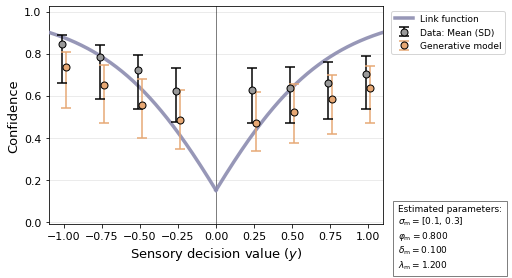

In [6]:
remeta.plot_link_function(stimuli, confidence, dv_sens, params);

We set up a model with the same generative parameters, including a metacognitive noise parameter that is dependent on the sign of the decision value:

In [7]:
cfg = remeta.Configuration()
cfg.enable_noise_meta = 2
cfg.enable_evidence_bias_add_meta = 1
cfg.enable_confidence_bias_mult_meta = 1
cfg.gridsearch = False  # we deactivate gridsearch -- it would take a long time for this complex model
rem = remeta.ReMeta(cfg=cfg)

The upward shift of the link function is caused by the positive evidence bias - but only indirectly; in fact, inward shift of the two wings of the link function. Note that bias parameters are not parameters of the link function. Yet, since the link function is a function of metacognitive evidence $z$ and $z$ results from sensory decision values _after_ accounting for evidence biases, we see the effect of the evidence biases in the plot. On the other hand, the plot of the link function is not affected by the multiplicative confidence bias, which operates at a later stage.

We see that the data show a flatter confidence-decisionvalue relationship for positive decision values. This is due to the fact that metacognitive noise is higher for the positive stimulus category.

Finally we fit the model, to see whether we can recover the generative parameters:

In [8]:
rem.fit(stimuli, choices, confidence)


+++ Sensory level +++
Initial guess (neg. LL: 6602.12)
    [guess] noise_sens: 0.1
    [guess] bias_sens: 0
Performing local optimization
    [final] noise_sens: 0.605
    [final] bias_sens: -0.0203
Final neg. LL: 2009.94
Total fitting time: 0.82 secs

+++ Metacognitive level +++
Initial guess (neg. LL: 9228.37)
    [guess] noise_meta_0: 0.2
    [guess] noise_meta_1: 0.2
    [guess] evidence_bias_mult_meta: 1
    [guess] evidence_bias_add_meta: 0
    [guess] confidence_bias_mult_meta: 1
Performing local optimization
    [final] noise_meta: [0.0989, 0.296]
    [final] evidence_bias_mult_meta: 0.706
    [final] evidence_bias_add_meta: 0.109
    [final] confidence_bias_mult_meta: 1.27
Final neg. LL: 8751.75
Total fitting time: 39 secs


Given the complexity of the model, this is not too bad!

<a id='uc3'></a>

### Use case 3: Criterion-based link function with variable confidence levels

In [9]:
stimuli, choices, confidence, params, dv_sens = remeta.load_dataset(
    'criteria_levels', return_params=True, return_dv_sens=True
)

Loading dataset 'criteria_levels' which was generated as follows:
..Generative model:
    Metatacognitive noise type: noisy_report
    Metatacognitive noise distribution: truncated_norm
    Link function: 2_criteria
..Generative parameters:
    noise_sens: 0.6
    bias_sens: 0
    noise_meta: 0.1
    criteria_meta: [0.3, 0.7]
    levels_meta: [0.2, 0.6]
..Characteristics:
    No. subjects: 1
    No. samples: 1000
    Type 1 performance: 82.6%
    Avg. confidence: 0.357
    M-Ratio: 0.809


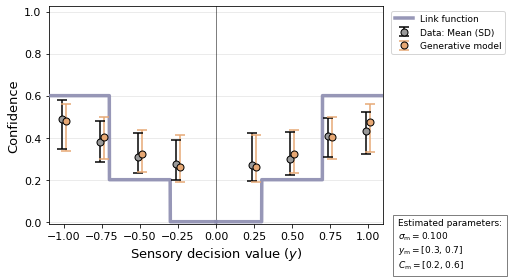

In [10]:
remeta.plot_link_function(stimuli, confidence, dv_sens, params, meta_link_function='2_criteria');

In [11]:
cfg = remeta.Configuration()
cfg.enable_criteria_meta = 1
cfg.enable_levels_meta = 1
cfg.enable_evidence_bias_mult_meta = 0
cfg.enable_evidence_bias_add_meta = 0
cfg.gridsearch = False
cfg.meta_link_function = '2_criteria'
rem = remeta.ReMeta(cfg)

In [12]:
rem.fit(stimuli, choices, confidence)


+++ Sensory level +++
Initial guess (neg. LL: 1449.20)
    [guess] noise_sens: 0.1
    [guess] bias_sens: 0
Performing local optimization
    [final] noise_sens: 0.644
    [final] bias_sens: 0.0322
Final neg. LL: 422.29
Total fitting time: 0.41 secs

+++ Metacognitive level +++
Initial guess (neg. LL: 1901.81)
    [guess] noise_meta: 0.2
    [guess] criterion0_meta: 0.3333
    [guess] level0_meta: 0.3333
    [guess] criterion1_meta: 0.6667
    [guess] level1_meta: 0.6667
Performing local optimization
LL Nelder_mead: 1722.632
    [final] noise_meta: 0.0931
    [final] criterion0_meta: 0.519
    [final] level0_meta: 0.232
    [final] criterion1_meta: 0.771
    [final] level1_meta: 0.596
Final neg. LL: 1722.63
Total fitting time: 16 secs


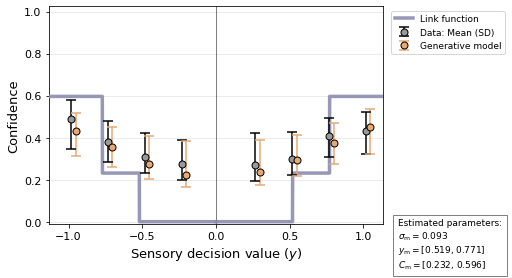

In [13]:
rem.plot_link_function()